# Momentum
Momentum is a concept that can be used to improve optimizers and remove noise from the gradient descent itself. In this notebook, we will look at stochastic gradient descent with momentum as an example. For example, in stochastic gradient descent we would take $k=1$ datapoints, and in gradient descent we would use $k=n$ where $n$ is the number of samples in the dataset - that is, we use the entire dataset. Gradient descent would give us the quickest and smoothest descent towards the minima, but this is unfeasible due to memory constraints. Stochastic gradient descent, on the other hand, would be more noisy and will take longer to reach the minimum, but is more space efficient. 

![How gradient descent methods find the minimum](img/gd_sgd_momentum.png)

The noisy signal means that it takes more time to reach the global minimum. It would thus be a goal to remove this noise and, as the image above shows, the noisy signal of SGD can be reduced. The concept of exponentially moving average (or moving mean) is fundamental to momentum and thus reducing the noise in this signal. 

## Exponentially Moving Average
The exponentially moving average considers datapoints in a time series: $(t_1, b_1), (t_2, b_2),...,(t_n, b_n)$. We create a variable $V$, and we have a constant $0 \leq \gamma \leq 1$. $V_1$ tells us that at time $t_1$, we have a reading $b_1$: $V_1 = b_1$. At $V_2$, we have $\gamma \times V_1 + b_2$. $\gamma$ essentially scales the previous reading down - so at $V_2$, the highest weighted term is $b_2$, and $b_1$ is part of the term but is scaled by $\gamma$. Going further, we would have $V_3 = \gamma \times V_2 + b_3$, $V_4 = \gamma \times V_3 + b_4$, etc. In the general form, $V_n = \gamma \times V_{n-1} + b_n$. 

We could also decompose this in another way. If $V_3 = \gamma \times V_2 + b_3$, we can expand $V_2$ and express it as $\gamma \times (\gamma \times V_1 + b_2) + b_3$, or $\gamma^2 \times b_1 + \gamma b_2 + b_3$. Let us say that $\gamma = 0.5$, then this would be $0.25b_1 + 0.5b_2 + b_3$ - this is just to illustrate how a moving average is calculated between $b_1$ and $b_n$. It scales previous values down, where the further you are from the current reading the more it is scaled down, and this reduces noise. Understanding this, how do we apply this to stochastic gradient descent? 

## Stochastic Gradient Descent with Momentum
As a reminder, our weight update formula is $w_\text{new} = w_\text{old} - \alpha \times \frac{dL}{dw_\text{old}}$. By using momentum, this becomes: 

$w_\text{new} = w_\text{old} - [\gamma V_{t-1} + \alpha \times \frac{dL}{dw_\text{old}}]$ 

and $V_{t-1}$ is: 

$V_{t-1} = 1 \times [\frac{dL}{dw_\text{old}}]_t + \gamma[\frac{dL}{dw_\text{old}}]_{t-1} + \gamma^2[\frac{dL}{dw_\text{old}}]_{t-2}$

This is momentum implemented into our stochastic gradient descent - we reduce the noise as we go down towards the global minimum. 

Our algorithm is going to be essentially the same as SGD, only we change our current gradient to include the decay $\gamma$ multiplied by the previous gradient. The pseudocode will look a bit like: 

`prev_gradient = 0`

`FOR i FROM 0 -> max_iterations:`

        current_gradient = gamma * prev_gradient - learning_rate * derivative_of_cost

        weight += current_gradient 

        prev_gradient = current_gradient
    
`ENDLOOP`

I will be using [this](https://www.youtube.com/watch?v=7EuiXb6hFAM) video as a reference. 

In [21]:
def f(w1, w2, x):
    ''' Linear regression example, where f is the function we are estimating parameters for. 
        w1 is bias, w2 is slope, and x is a datapoint. 
    '''
    yhat = w1 + w2 * x 
    return yhat

def dx_w1(w1, w2, x, y):
    ''' Computes partial derivative of weight w1 for function f '''
    yhat = f(w1, w2, x)
    gradient = 2 * (yhat - y)
    return gradient 

def dx_w2(w1, w2, x, y):
    ''' Computes partial derivative of weight w2 for function f '''
    yhat = f(w1, w2, x)
    gradient = 2*x*(yhat - y)
    return gradient

def stochastic_gradient_descent(xs, ys, alpha=0.01, gamma=0.9, max_iter=1000):
    # Randomly initialise w1 and w2
    w1 = np.random.uniform(0, 1, 1)
    w2 = np.random.uniform(0, 1, 1)

    # Initialise previous gradients to 0
    prev_gradient_w1 = 0
    prev_gradient_w2 = 0 
    
    iteration = 0 

    while iteration < max_iter:
        
        # Select one random datapoint
        perm = permutation(len(xs))
        xr = xs[perm]
        yr = ys[perm]
        x = xr[0]
        y = yr[0]

        # Compute our gradients
        gradient_w1 = gamma * prev_gradient_w1 - alpha * dx_w1(w1, w2, x, y)
        gradient_w2 = gamma * prev_gradient_w2 - alpha * dx_w2(w1, w2, x, y)

        # Update weights using gradients
        w1 += gradient_w1 
        w2 += gradient_w2 

        # Update previous gradients
        prev_gradient_w1 = gradient_w1
        prev_gradient_w2 = gradient_w2

        iteration += 1 

        if iteration % 100 == 0:
            print(f"====================")
            print(f"Iteration {iteration}")
            print(f"w1, w2 {w1, w2}")

    return (w1, w2)

In [29]:
x_train

array([ 3.,  7., 87., 30., 11., 15., 89., 25., 82., 59., 19., 72., 12.,
       16.,  8., 75., 51., 62., 47.,  6., 56., 97., 80., 31., 84., 23.,
       70., 90., 34., 38., 24., 67.,  1., 55., 63., 93., 61., 64., 81.,
       85., 33., 13., 79., 94., 26., 92., 28.,  9., 83.,  0., 14., 44.,
       95., 65., 40., 86., 48., 66.,  4., 17., 60., 50., 88., 10., 69.,
       36., 22., 71., 45.,  5.,  2., 73., 43., 42., 35., 99., 18., 20.,
       91., 39.])

In [30]:
xs = np.array([1,2,3,4,5,6,7])
ys = np.array([1,2,3,4,5,6,7])
(w1, w2) = stochastic_gradient_descent(xs, ys)
print(w1, w2)

Iteration 100
w1, w2 (array([-0.14915025]), array([1.19184774]))
Iteration 200
w1, w2 (array([-0.1285237]), array([0.89171514]))
Iteration 300
w1, w2 (array([0.11330201]), array([0.92558588]))
Iteration 400
w1, w2 (array([0.0004588]), array([0.94559116]))
Iteration 500
w1, w2 (array([-0.00491534]), array([1.01901906]))
Iteration 600
w1, w2 (array([0.00894769]), array([1.00840481]))
Iteration 700
w1, w2 (array([-0.00320316]), array([1.00490073]))
Iteration 800
w1, w2 (array([-0.00021486]), array([0.99953816]))
Iteration 900
w1, w2 (array([-0.00262538]), array([0.99720699]))
Iteration 1000
w1, w2 (array([-0.0091359]), array([0.99642298]))
[-0.0091359] [0.99642298]


In the below code, I implement momentum to the existing implementation of SGD which we have in gradient_descent.ipynb. 

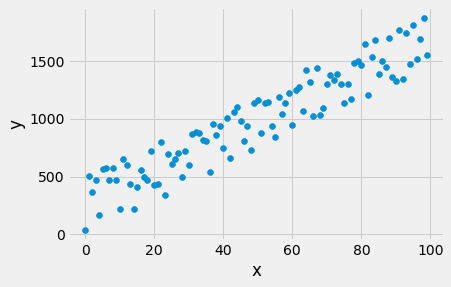

In [57]:
import numpy as np 
from numpy.random import permutation
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use("fivethirtyeight")
import seaborn as sns 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Simulate data
true_slope = 14.321
true_intercept = 7.2 
input_var = np.arange(0.0, 100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var)) 

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
def compute_cost(input_var, output_var, params):
    ''' Computes the cost of the linear regression. '''
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        # Make a prediction
        y_hat = np.dot(params, np.array([1.0, x])) # dot product between theta and x bar
        cost_sum += (y - y_hat) ** 2 # Square difference to get cost

    cost = cost_sum / (num_samples * 2.0) 
    
    return cost

In [62]:
def lin_stoch_gradient_descent_momentum(input_var, output_var, params, alpha, gamma):
    num_samples = len(input_var)
    cost = np.zeros(num_samples)                                     # This will store cost for each iteration
    params_store = np.zeros([2, num_samples])                        # This will store parameters for each iteration
    iteration = 0
    prev_gradient = 0

    for x, y in zip(input_var, output_var):                 # Loop over data
        cost[iteration] = compute_cost(input_var, output_var, params)
        y_hat = np.dot(params, np.array([1.0, x]))          # Compute y hat
        current_gradient = gamma * prev_gradient + alpha * (np.array([1.0, x]) * (y - y_hat))         # Compute gradient
        params +=  current_gradient / num_samples            # Update parameters based on gradient
        prev_gradient = current_gradient 
        params_store[:, iteration] = params
    
        print('=======================')
        print(f'Iteration {iteration}\nCost {cost[iteration]}')
        print('=======================')

        iteration += 1

    return params, cost, params_store

We can now run this and see how it performs: 

In [63]:
alpha = 1e-3 
gamma = 0.9
params_theta = np.array([20.0, 80.0])
params_hat_momentum, cost_momentum, params_store_momentum = lin_stoch_gradient_descent_momentum(x_train, y_train, params_theta, alpha, gamma)

Iteration 0
Cost 6492020.172880434
Iteration 1
Cost 5898342.833847249
Iteration 2
Cost 5378600.759412039
Iteration 3
Cost 4090459.778262717
Iteration 4
Cost 2960641.275706794
Iteration 5
Cost 2100033.7350415746
Iteration 6
Cost 1434950.9354650062
Iteration 7
Cost 811930.4280916387
Iteration 8
Cost 389450.7862768632
Iteration 9
Cost 140117.63917297474
Iteration 10
Cost 30803.689461456983
Iteration 11
Cost 37807.66882195862
Iteration 12
Cost 121960.38614844887
Iteration 13
Cost 257778.3423441903
Iteration 14
Cost 403074.54859917884
Iteration 15
Cost 536436.2459226047
Iteration 16
Cost 550410.573284469
Iteration 17
Cost 462458.3169453026
Iteration 18
Cost 351179.81500040786
Iteration 19
Cost 238119.61151907383
Iteration 20
Cost 151090.19171957544
Iteration 21
Cost 83971.59418256779
Iteration 22
Cost 42402.432064802255
Iteration 23
Cost 23837.501302283785
Iteration 24
Cost 23141.742043045575
Iteration 25
Cost 36093.48094695065
Iteration 26
Cost 57982.21610789903
Iteration 27
Cost 86680.658

And we can plot the parameters that we have learned to see how they perform. 

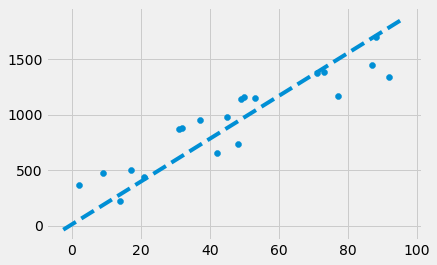

In [64]:
# Plot parameters from SGD with momentum
plt.figure()
plt.scatter(x_test, y_test)
abline(params_hat_momentum[0], params_hat_momentum[1])

plt.show()

That said, to observe how it differs from regular stochastic descent, we can plot the costs of SGD with and without momentum, so we will run an SGD without momentum and then make a plot to see the difference. 

In [66]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    num_samples = len(input_var)
    cost = np.zeros(num_samples)                                     # This will store cost for each iteration
    params_store = np.zeros([2, num_samples])                        # This will store parameters for each iteration
    iteration = 0

    for x, y in zip(input_var, output_var):                 # Loop over data
        cost[iteration] = compute_cost(input_var, output_var, params)
        y_hat = np.dot(params, np.array([1.0, x]))          # Compute y hat
        gradient = np.array([1.0, x]) * (y - y_hat)         # Compute gradient
        params += alpha * gradient / num_samples            # Update parameters based on gradient
        params_store[:, iteration] = params
    
        print('=======================')
        print(f'Iteration {iteration}\nCost {cost[iteration]}')
        print('=======================')

        iteration += 1

    return params, cost, params_store

In [67]:
alpha = 1e-3 
params_theta = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent(x_train, y_train, params_theta, alpha)

Iteration 0
Cost 6492020.172880434
Iteration 1
Cost 5898342.833847249
Iteration 2
Cost 5888032.611009313
Iteration 3
Cost 4924029.978640802
Iteration 4
Cost 4755759.260149173
Iteration 5
Cost 4754551.586409722
Iteration 6
Cost 4699437.779934738
Iteration 7
Cost 4146059.241456479
Iteration 8
Cost 4007686.0101576885
Iteration 9
Cost 3876695.313129241
Iteration 10
Cost 3482745.3760559885
Iteration 11
Cost 3173110.523224964
Iteration 12
Cost 2707081.940943384
Iteration 13
Cost 2709249.2417373816
Iteration 14
Cost 2384352.426207735
Iteration 15
Cost 2194921.0898584044
Iteration 16
Cost 1702855.979544336
Iteration 17
Cost 1310696.2490077638
Iteration 18
Cost 1209791.328479983
Iteration 19
Cost 1059666.3827806974
Iteration 20
Cost 1043327.5918058932
Iteration 21
Cost 1007221.043981062
Iteration 22
Cost 940793.4198405597
Iteration 23
Cost 935513.5537985982
Iteration 24
Cost 936474.7975294357
Iteration 25
Cost 934554.882700908
Iteration 26
Cost 847856.0485358235
Iteration 27
Cost 822569.1667165

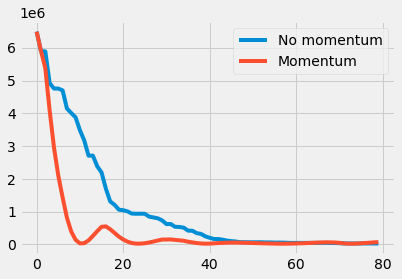

In [72]:
# Plot costs
plt.figure()
plt.plot(cost, label='No momentum')
plt.plot(cost_momentum, label='Momentum')
plt.legend()
plt.show()

## Conclusion
We  can see that using momentum leads to a much smoother and quicker convergence with less zig-zagging. 